# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function

def sigmoid(x):
    return 1/(1 + np.exp(-x));

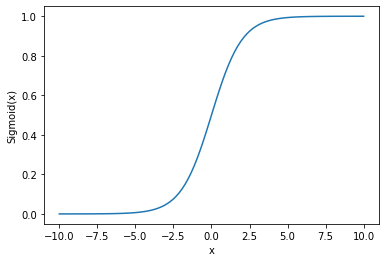

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 

x_val = np.linspace(-10,10,100); #100 points between -10 & 10

#Find y_val, by using sigmoid function

y_val = sigmoid(x_val);

#Plot x_val,y_val and label the graph

plt.plot(x_val,y_val);
plt.xlabel("x");
plt.ylabel("Sigmoid(x)");

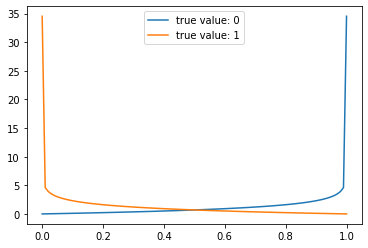

In [4]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss

# predictions as 0 to 1 in 0.01 increments

yhat = [i*0.01 for i in range(0, 101)];

# evaluate predictions for a 0 true value

loss_zero= [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value

loss_one= [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss

plt.plot(yhat, loss_zero, label="true value: 0");
plt.plot(yhat, loss_one, label="true value: 1");
plt.legend();
plt.show();

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]= abs(min(loss_zero)-min(loss_one))
print(ans[0]);

0.0


# ***`Processing the Data`***

In [6]:
#Import the dataset of iris from datasets.load_iris()
iris=datasets.load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data1['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
#Look into the top 5 rows of data

data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


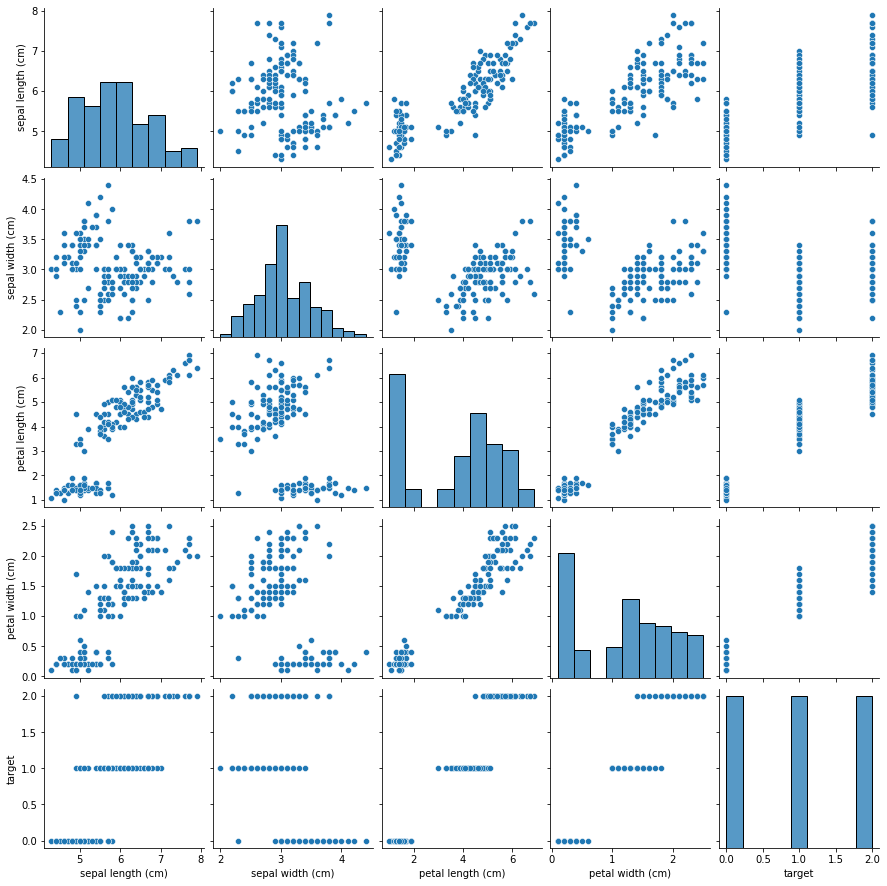

In [8]:
#Visualize  the data using seaborn pairplot

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data1)

In [9]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

# Create new array of numerical labels

arr=np.array(labelencoder.fit_transform(data1['species']))
print(arr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# Drop old labels(char) data 
data1['species']=""

# Substitute new labels(numerical) into data
data1['species']= arr
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,2
146,6.3,2.5,5.0,1.9,2.0,2
147,6.5,3.0,5.2,2.0,2.0,2
148,6.2,3.4,5.4,2.3,2.0,2


In [11]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"

data1_new=data1[data1['species']<2]
data1_new.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000,1.000000


In [12]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)

means = data1.groupby('species').mean()
print(means)
ans[1]=means['sepal length (cm)'][0]-means['sepal length (cm)'][1]
ans[1]


         sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
species                                       ...                          
0                    5.006             3.428  ...             0.246     0.0
1                    5.936             2.770  ...             1.326     1.0
2                    6.588             2.974  ...             2.026     2.0

[3 rows x 5 columns]


-0.9300000000000006

# ***`Obtaining Weight Values`***

In [13]:
# Split the data into X and y

data1_new = data1_new.drop(['species'], axis = 1)
X = data1_new.drop('target', axis = 1)
y = data1_new['target']
print(X)
print(y)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
..                ...               ...                ...               ...
95                5.7               3.0                4.2               1.2
96                5.7               2.9                4.2               1.3
97                6.2               2.9                4.3               1.3
98                5.1               2.5                3.0               1.1
99                5.7               2.8                4.1               1.3

[100 rows x 4 columns]
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
  

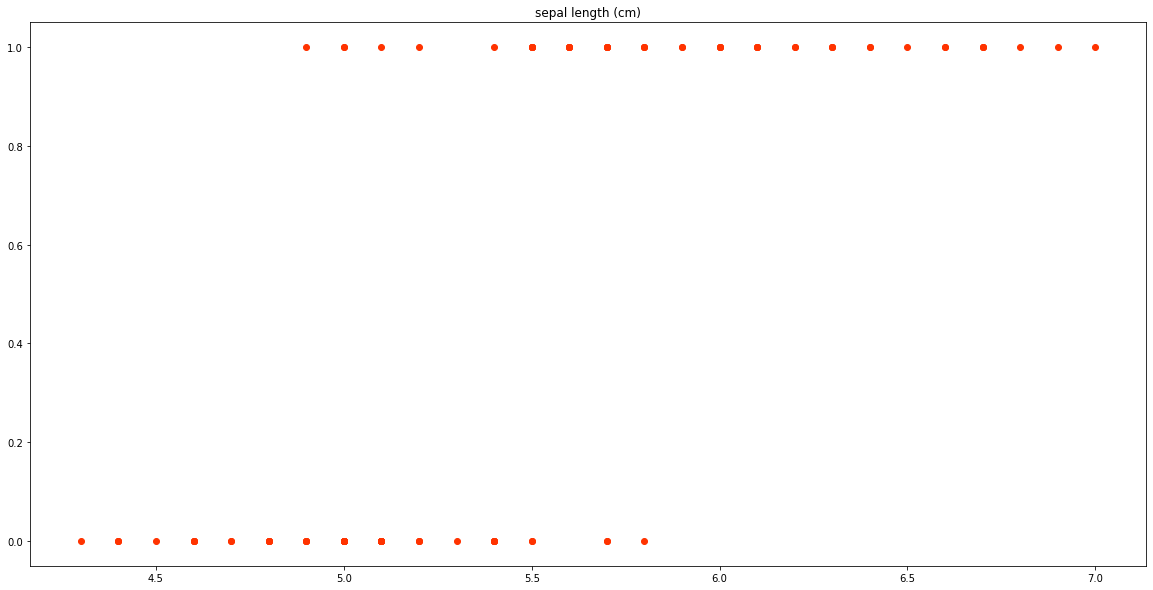

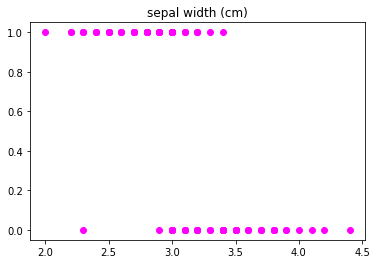

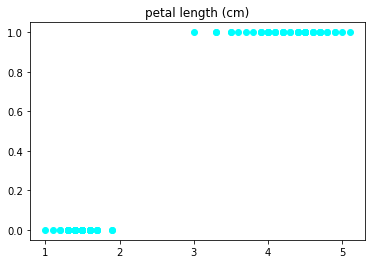

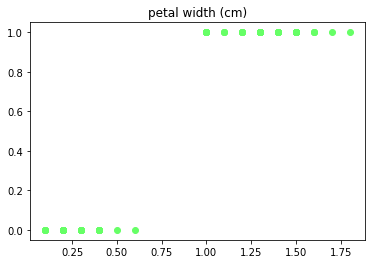

In [14]:
# Visualize X,y
plt.figure(figsize = (20, 10))
plt.scatter(X['sepal length (cm)'], y, color = '#ff3300')
plt.title("sepal length (cm)")
plt.show()
plt.scatter(X['sepal width (cm)'], y, color = '#ff00ff')
plt.title("sepal width (cm)")
plt.show()
plt.scatter(X['petal length (cm)'], y, color = '#00ffff')
plt.title("petal length (cm)")
plt.show()
plt.scatter(X['petal width (cm)'], y, color = '#66ff66')
plt.title("petal width (cm)")
plt.show()
#plt.legend()
#plt.plot()

In [15]:
# Convert X,y into arrays
X=np.array(X)
y=np.array(y)

In [16]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression

#Building our model
model = LogisticRegression().fit(X_train,y_train)

#Finding the parameter and bias
w = model.coef_
b = float(model.intercept_)
w = w[0]

In [18]:
#Printing the parameters and bias
print(w)
print(b)

[ 0.45808171 -0.83895654  2.21684247  0.92362595]
-6.5266650038990734


In [19]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
ans[2] = w.tolist() + [b]
print(ans[2])

[0.45808171067944053, -0.8389565384015345, 2.2168424707599437, 0.9236259535228264, -6.5266650038990734]


In [20]:
#Predicitng on our test data
y_pred = model.predict(X_test)

In [21]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
ans[3]=accuracy_score(y_test,y_pred)
print(ans[3])

1.0


In [22]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
#print(model.predict([[4.9,4,1.2,0.4]]))
y1_pred = model.predict([[4.9,4,1.2,0.4]])
s = ""
if y1_pred == 0:
  s = "Setosa"
else:
  s = "Versicolor"  

In [23]:
#The class of the input
ans[4] = s
print(ans[4])

Setosa


In [24]:
import json
ans = [str(item) for item in ans]

filename = "group62_luvkhoiwal10@gmail.com_Aman_Khoiwal_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [25]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'group62_luvkhoiwal10@gmail.com_Aman_Khoiwal_LogisticRegression',
 'status': 'Success'}
